## Exploratory Data Analysis on My Spotify Streaming History 

In this project, I will be exploring my `Spotify` streaming history. `Spotify` is a very popular music straming service used in most countries worldwide. The dataset I will be using showcases my personal usage/history on the platform. 

The dataset shows:
- the list of songs I have played
- the list on song artists 
- How long my usage was and much more. 

I downloaded the dataset from Spotify's `Privacy Setting` section. Here you can download your personal data.

### 0. Imports 

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud 
%matplotlib inline 

### 1. Reading in the Files

 Spotify provided the data in a `zipped folder` that contains anot of information about my account. I will be focusing on my straming history only.
   
Here I will use the `read_json` function from Pandas to read the JSON files. 

In [3]:
df1 = pd.read_json("MyData/StreamingHistory0.json")
df2 = pd.read_json("MyData/StreamingHistory1.json")
df3 = pd.read_json("MyData/StreamingHistory2.json")

display(df1.head(3))

,endTime,artistName,trackName,msPlayed
0,2021-05-27 15:15,Zara Larsson,Need Someone,15456
1,2021-05-27 15:18,Zara Larsson,Love Me Land,160009
2,2021-05-27 15:21,Zara Larsson,Talk About Love (feat. Young Thug),199775


### 2. Data Preparation & Cleaning

1. Merge the three different Straming History JSON Files.
2. Convert the `endTime` column into datetime type. 
3. Convert the `msPlayed` column into (`Hours, Minutes`)
4. Add more columns useful for data analysis. 

#### 2.1 Merging The Datasets

In [4]:
stream_history_df = pd.concat([df1, df2, df3], ignore_index=True)
display(stream_history_df)

,endTime,artistName,trackName,msPlayed
0,2021-05-27 15:15,Zara Larsson,Need Someone,15456
1,2021-05-27 15:18,Zara Larsson,Love Me Land,160009
2,2021-05-27 15:21,Zara Larsson,Talk About Love (feat. Young Thug),199775
3,2021-05-27 15:24,Zara Larsson,Need Someone,177362
4,2021-05-27 15:28,Zara Larsson,Right Here,226238
...,...,...,...,...
22151,2022-05-27 21:39,Cassandra Nestico,Mystique,4820
22152,2022-05-27 21:39,Mark Ronson,Bird Calling,71775
22153,2022-05-27 21:41,Avenue Beat,just the two of us,104570
22154,2022-05-27 21:42,Fleetwood Mac,Dreams - 2004 Remaster,26310


The merged dataset contains 22156 rows. We used the `ignore_index` attribute to reset the index and make a new one as all three dataframes have their own individual index.

In [5]:
# Save csv data 
stream_history_df.to_csv("spotify_data.csv")

In [6]:
# Info method to do a quick check on the data contained in the dataframe 
stream_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22156 entries, 0 to 22155
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     22156 non-null  object
 1   artistName  22156 non-null  object
 2   trackName   22156 non-null  object
 3   msPlayed    22156 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 692.5+ KB


There are no `null` or `NaN` values in the dataset. 

In [7]:
# Unique method to see the unique elements present in the dataset
stream_history_df.nunique()

endTime       11828
artistName     2194
trackName      4464
msPlayed      11012
dtype: int64

The `nunique` function shows that I have 4464 unique songs in my streaming history. 

#### 2.2 Cleaning & Formating 
- We will us `pd.to_Datetime` function to convert an object column into a datetime column. 


- Then will be using the `pd.DatetimeIndex` to obtain date time information like `year`, `month`, `day`, `weekday`, `time`, `hour`, `day_name`. 

In [8]:
# Use pd.to_datetime method convert an object column into a datetime column.
stream_history_df["Play-Time"] = pd.to_datetime(stream_history_df["endTime"])

In [9]:
stream_history_df["year"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).year
stream_history_df["month"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).month
stream_history_df["day"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).day
stream_history_df["weekday"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).weekday
stream_history_df["time"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).time
stream_history_df["hour"]  = pd.DatetimeIndex(stream_history_df["Play-Time"]).hour
stream_history_df["day-name"]  = stream_history_df["Play-Time"].apply(lambda x: x.day_name())
stream_history_df['Count'] = 1 

We will also be using the `pd.to_timedelta` module to obtain the information regarding the time frame of the song played in milliseconds and add it to a new column `Time-Played (hh-mm-ss)`

In [10]:
stream_history_df["Time-Played (hh-mm-ss)"]= pd.to_timedelta(stream_history_df["msPlayed"], unit='ms')

Here we will create two new functions named `hours` & `minutes`, these will help to convert the time obtained in `Time-Playes (hh-mm-ss)` to approximate hours and minutes.

We will use the `apply` method to apply the two functions alongside the `round` method to do the calculation and approximation.

In [11]:
def hours(t):
    """To get the hour informaiton"""
    return t.seconds/3600

def minutes(t):
    """To get the minute information"""
    return (t.seconds/60)%60

stream_history_df["Listening Time(Hours)"] = stream_history_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
stream_history_df["Listening Time(Minutes)"] = stream_history_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)


In [12]:
stream_history_df.head(3)

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hour,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2021-05-27 15:15,Zara Larsson,Need Someone,15456,2021-05-27 15:15:00,2021,5,27,3,15:15:00,15,Thursday,1,0 days 00:00:15.456000,0.004,0.250
1,2021-05-27 15:18,Zara Larsson,Love Me Land,160009,2021-05-27 15:18:00,2021,5,27,3,15:18:00,15,Thursday,1,0 days 00:02:40.009000,0.044,2.667
2,2021-05-27 15:21,Zara Larsson,Talk About Love (feat. Young Thug),199775,2021-05-27 15:21:00,2021,5,27,3,15:21:00,15,Thursday,1,0 days 00:03:19.775000,0.055,3.317


Now, we can see that we have alot of columns, so now its time to drop the columns that are not useful to the analysis.


We will be dropping the following columns: 
1. `endTime` since we have the new `Play-Time` column with all the information in the proper format. 

2. `msPlayed`, as we have the `Time-Played (hh-mm-ss)` column in proper format.

3. `Time-Played (hh-mm-ss)`, as we have the approx time and minutes in the `Listening Time(Hours)` & `Listening Time(Minutes)` columns.

In [13]:
stream_history_df.drop(columns=["endTime", "msPlayed", "Time-Played (hh-mm-ss)"], inplace=True)

Here we set `inplace` as `True` which allows us to update the dataframe directly.

In [14]:
# Check for any abnormalities
stream_history_df.describe()

,year,month,day,weekday,hour,Count,Listening Time(Hours),Listening Time(Minutes)
count,22156.000000,22156.000000,22156.000000,22156.000000,22156.000000,22156.0,22156.000000,22156.000000
mean,2021.515752,6.084898,16.116628,2.723912,14.020717,1.0,0.021214,1.241992
std,0.499763,3.429960,8.880918,1.965215,6.341416,0.0,0.048155,1.777995
min,2021.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2021.000000,3.000000,8.000000,1.000000,13.000000,1.0,0.001000,0.033000
50%,2022.000000,5.000000,16.000000,3.000000,15.000000,1.0,0.006000,0.367000
75%,2022.000000,9.000000,24.000000,4.000000,18.000000,1.0,0.041000,2.433000
max,2022.000000,12.000000,31.000000,6.000000,23.000000,1.0,3.000000,48.750000


## 3. Exploratory Analysis and Visualization 

- Setup visualziation environments for plots. 
- Explore the demographics of different columns to gain insight 
- Try to understand how the dataset is and how we can get the most out of it.

In [15]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

Here we are using `Seaborn` & `Matplotlib` modules to shape our graphs and visualization. 
- The `set_style` function from `seaborn` helps to fix the style of all our graphs.
- The other `rcParams` function from `Matplotlib` will help to set the other characteristics of our graphs like `font size`, `figure size`, and the `face colors`.

### 3.1 Artist Name 
To explore artists, we will be: 
- checking what percentage of unique artists we have. 
- check the top 10 unique artists we have. 

####  3.1.1 Percentage of Unique Artists 

In [173]:
# count the number of unique artists
unique_artists = stream_history_df["artistName"].nunique()
display(unique_artists)
# count the number of total artists
total_artists = stream_history_df["artistName"].count()
# get the percentage of unique artists
unique_artists_percentage = 100 *( unique_artists/total_artists)
unique_artists_percentage

2194

9.902509478245172

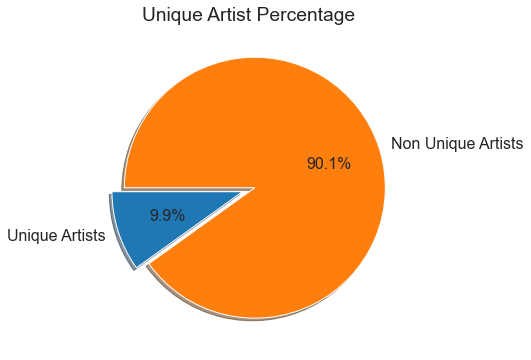

In [17]:
# create an array of the results
unique_artists_list = np.array([unique_artists, total_artists-unique_artists])
# create labels 
unique_artists_list_labels = ["Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artists_list, labels= unique_artists_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage")
plt.show()

The percentage of unique artists is `9.9%`. This suggests that I listen to multiple songs by an artists. 

####  3.1.2 Top 10 Unique Artists According 

In [18]:
top_10_unique_artists = stream_history_df.groupby(["artistName"])
top_10_unique_artists = top_10_unique_artists[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_unique_artists.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Maverick City Music,22.967,1377.562,428
Sigrid,10.809,650.931,362
Asake,6.099,366.085,236
Victony,5.814,348.916,171
Elton John,5.787,348.173,150
Elevation Worship,5.328,319.700,100
John Mayer,5.221,313.461,169
Valley,5.134,308.785,149
One Direction,5.028,301.114,185


Here we grouped the data according to `artisName` by using the `groupby` function, then got the sum of of columns on interest. 
    Then we sorted the results according to the `Listeneing Time(Minutes)` and arranged it in descending order.
    
Note: Here we see that the top 10 Artists lists varies in two ways:
1. In terms of the number of hours i.e number of hours of artist songs playes.
1. In terms of the number of counts i.e numbertimes songs played

Next, we'll try to explore then individually

####  3.1.3 Top 10 Unique Artists (Count):  Based on the number of count 

In [36]:
top_10_artists_count = stream_history_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artists_count.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Maverick City Music,22.967,1377.562,428
Sigrid,10.809,650.931,362
Joeboy,3.669,220.565,302
Justin Bieber,3.176,191.467,241
Asake,6.099,366.085,236
Burna Boy,3.457,208.089,225
Ayra Starr,4.762,286.132,192
WizKid,1.710,102.988,190
Rema,3.302,197.946,189


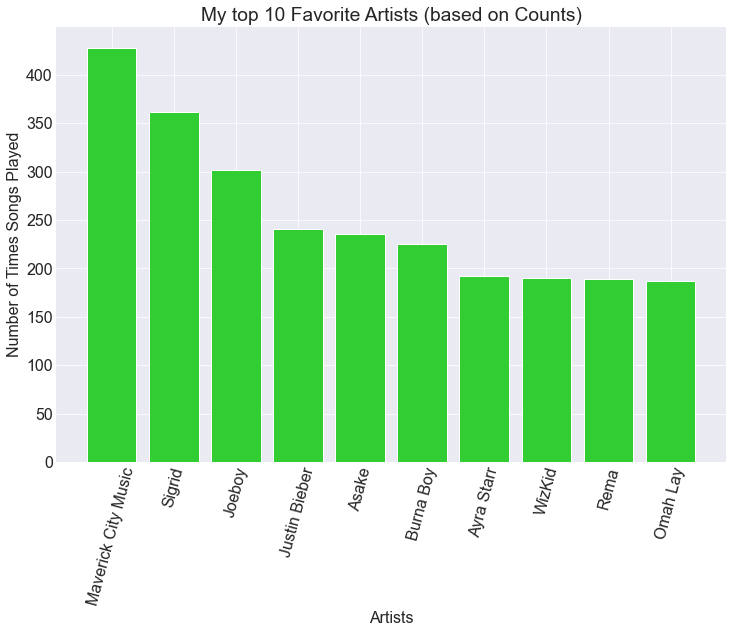

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_10_artists_count.head(10).index, top_10_artists_count["Count"].head(10), color="limegreen")
ax.set(title ='My top 10 Favorite Artists (based on Counts)', xlabel="Artists", ylabel="Number of Times Songs Played")
plt.xticks(rotation=75)
plt.show()

####  3.1.4 Top 10 Unique Artists (Hours):  Based on the number of hours 

In [38]:
top_10_artists_time = stream_history_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Hours)",ascending=False)
top_10_artists_time.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Maverick City Music,22.967,1377.562,428
Best Noise Labs,16.210,252.600,13
Sigrid,10.809,650.931,362
Asake,6.099,366.085,236
Victony,5.814,348.916,171
Elton John,5.787,348.173,150
Elevation Worship,5.328,319.700,100
John Mayer,5.221,313.461,169
Valley,5.134,308.785,149


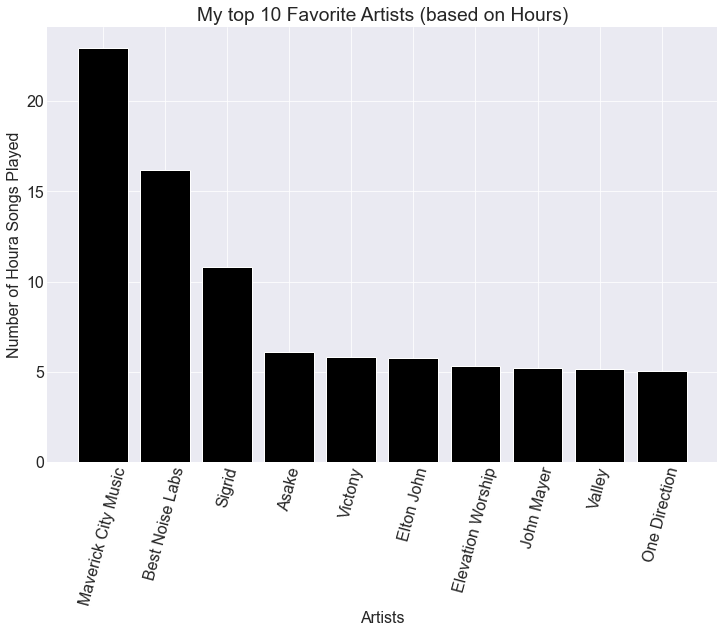

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_10_artists_time.head(10).index, top_10_artists_time["Listening Time(Hours)"].head(10), color="black")
ax.set(title ='My top 10 Favorite Artists (based on Hours)', xlabel="Artists", ylabel="Number of Houra Songs Played")
plt.xticks(rotation=75)
plt.show()

####  3.1.5 Top 10 Unique Artists (Hours) & Top 10 Unique Artists (Count)

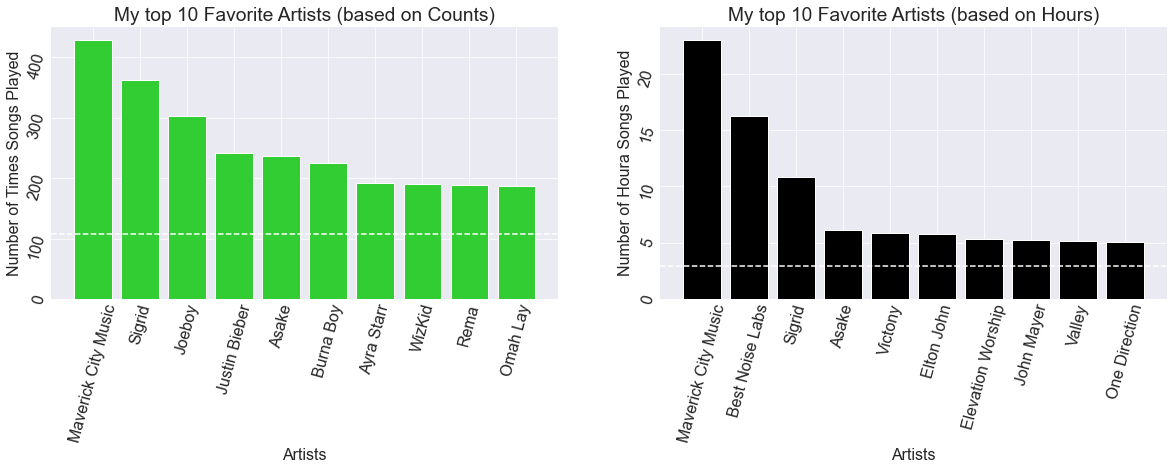

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

# First grph
ax1.bar(top_10_artists_count.head(10).index, top_10_artists_count["Count"].head(10), color="limegreen")
ax1.set(title ='My top 10 Favorite Artists (based on Counts)', xlabel="Artists", ylabel="Number of Times Songs Played")
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artists_count["Count"][:100].mean(), linestyle="--", color='white')

# Second grph
ax2.bar(top_10_artists_time.head(10).index, top_10_artists_time["Listening Time(Hours)"].head(10), color="black")
ax2.set(title ='My top 10 Favorite Artists (based on Hours)', xlabel="Artists", ylabel="Number of Houra Songs Played")
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artists_time["Listening Time(Hours)"][:100].mean(), linestyle="--", color='white')

plt.show()

Here we plotted both bar charts side by side, to show the variation in Top 10 Artists based on `number of hours` & `number of ocunts`. 
We also plotted the horizontal line with `axhline` to represent the mean value of the top 100 artists in both graphs.

### 3.2 Song Tracks 
To explore songs, we will be:
- check the percentage of unique songs we have 
- check the top 10 unique songs we have 

####  3.2.1 Percentage of Unique Songs 

4464

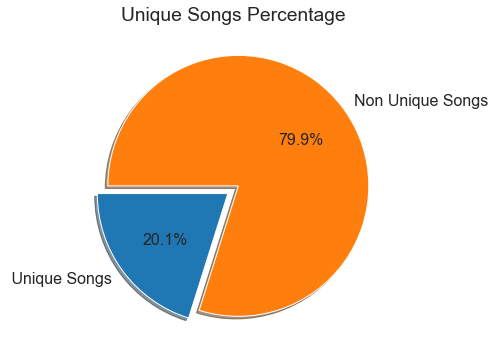

In [174]:
unique_songs = stream_history_df["trackName"].nunique()
display(unique_songs)
total_songs = stream_history_df["trackName"].count()
percentage_unqiue_songs = 100 * (unique_songs/total_songs)

unique_songs_list = np.array([unique_songs, total_songs-unique_songs ])
unique_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels = unique_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow=True)
plt.title("Unique Songs Percentage")

plt.show()


The Unique sonfs percentage come to about `20.1%`

####  3.2.2  Top 10 Unique Songs 

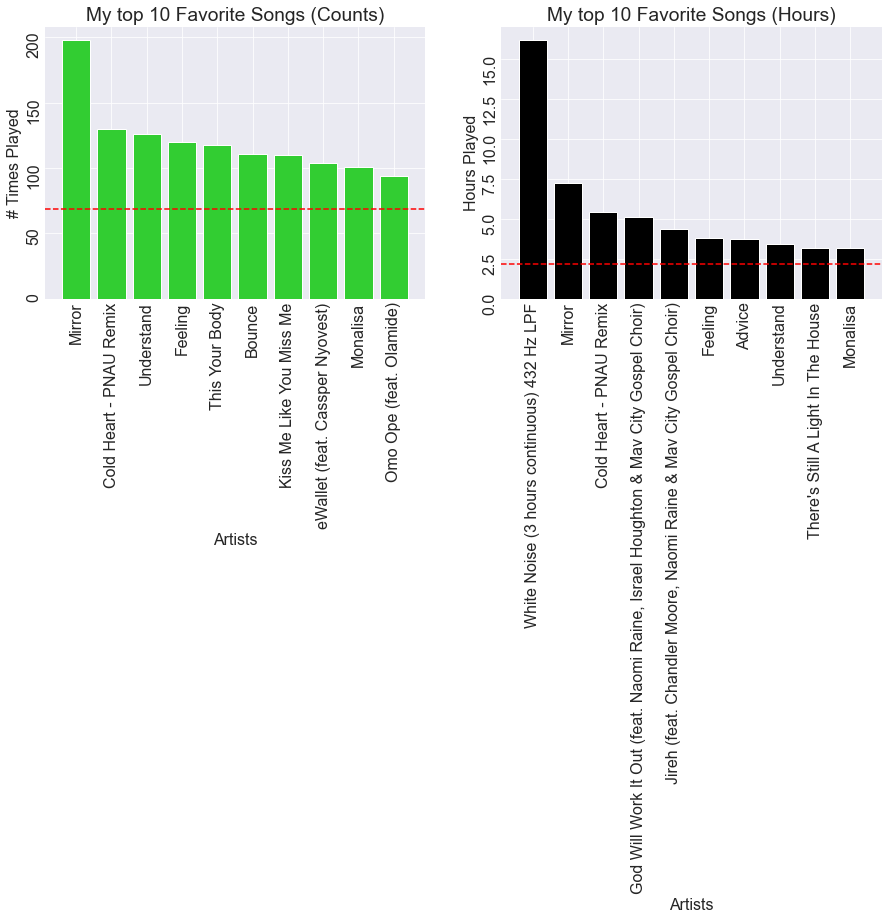

In [73]:
top_10_songs_count = stream_history_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count", ascending=False)
top_10_songs_time = stream_history_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Hours)", ascending=False)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# First grph
ax1.bar(top_10_songs_count.head(10).index, top_10_songs_count["Count"].head(10), color="limegreen")
ax1.set(title ='My top 10 Favorite Songs (Counts)', xlabel="Artists", ylabel="# Times Played")
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_count["Count"][:100].mean(), linestyle="--", color='red')

# Second grph
ax2.bar(top_10_songs_time.head(10).index, top_10_songs_time["Listening Time(Hours)"].head(10), color="black")
ax2.set(title ='My top 10 Favorite Songs (Hours)', xlabel="Artists", ylabel="Hours Played")
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_time["Listening Time(Hours)"][:100].mean(), linestyle="--", color='red')

plt.show()

As previously discusses, here we observer that there is a differnce between the two graphs and list of Top 10 Songs depending on whether we explore the `number of counts` or `number of hours`. 

### 3.3 Day Wise Usage
- Here we we will analyze the percentage of spotify streaming based on the day of the week.


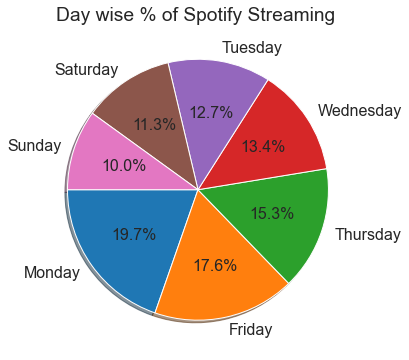

In [76]:
fig, ax = plt.subplots(figsize=(12,6))

ax.pie(stream_history_df["day-name"].value_counts(), labels=stream_history_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow=True)
ax.set(title="Day wise % of Spotify Streaming ")
plt.show()

This pie chart shows that I generally stream music on Spotify more on Mondays.

### 3.4 Average Usage over Day
Here, I will be analyzing 
- My spotify streaming through the course of the day.
- What time I use spotify more regularly.

We will use the `seaborn` `histplot` module to make a hostogram. 


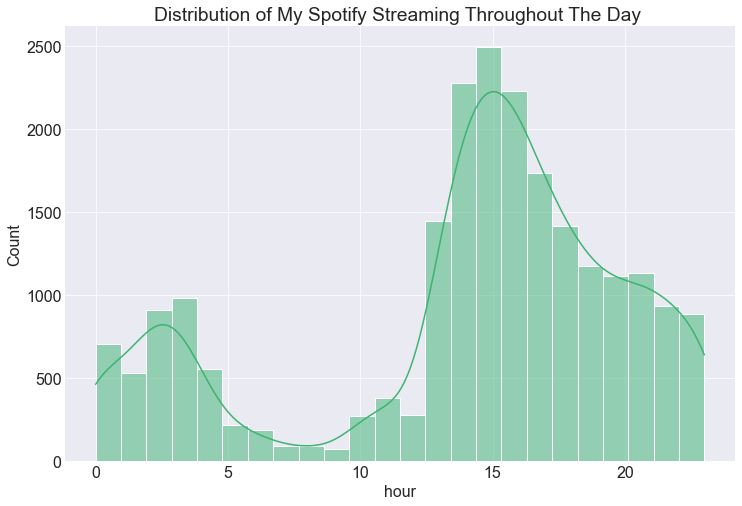

In [175]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set(title="Distribution of My Spotify Streaming Throughout The Day ")
sns.histplot(stream_history_df["hour"], bins=24, kde=True, color="mediumseagreen")
plt.show()

The histogram shows the following about my avergae usage:
- Maximum around `2-4PM` hour mark 
- Minimum around `7-9AM` hour mark 


### 3.5 Average Usage over Year


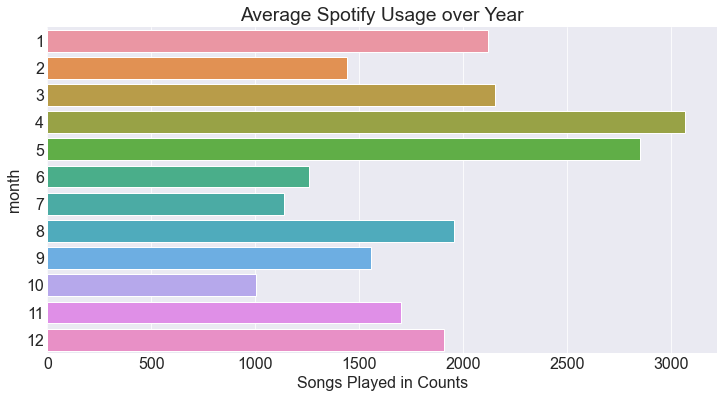

In [92]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=stream_history_df["month"], ax=ax)
ax.set(title='Average Spotify Usage over Year', xlabel="Songs Played in Counts")
plt.show()

This `countplot` shows that my spotify usage in April is always higher than other months.

## 4. Questions

### 4.1 Total Hours Spent On The Platform?

In [96]:
time_spent = stream_history_df["Listening Time(Hours)"].sum()
time_spent

470.02000000000004

I have spent a total of **470 Hours** on the platform 

### 4.2 Average Numbers of Songs Played Daily?



In [153]:
date_df = stream_history_df["Play-Time"]

# First well calculate the total amount of time between first long in, and last time I used spotify.
# Then we divide by `np.timedelta64` function to convert the result to days.
time_diff = (date_df.iloc[22155] - date_df.iloc[0]) / np.timedelta64(1, "D")

# Nect we multiply by 24 to convert into hours 
time_diff_hours  = time_diff*24

time_diff_hours

8766.5

**Note:** I was able to find the solution of finding the difference from two dates in pandas from [here](https://bramtunggala.medium.com/a-simple-way-to-finding-the-difference-between-two-dates-in-pandas-179d2714b6c)

In [176]:
total_songs = stream_history_df["trackName"].count()
total_songs

22156

In [118]:
time_diff

365.2708333333333

In [124]:
avg_songs_daily = (total_songs /time_diff).round()
avg_songs_daily

61.0

Here, we can see that I play around **61 songs** daily.

### 4.3 Day I Played Maximum Number of Songs ? 

In [130]:
stream_history_df["date"] = stream_history_df["Play-Time"].dt.date
most_songs = stream_history_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)


,Count
date,
2022-01-28,569


We can see that I played the most songs **(569 songs)** on the `28th of January 2022`.

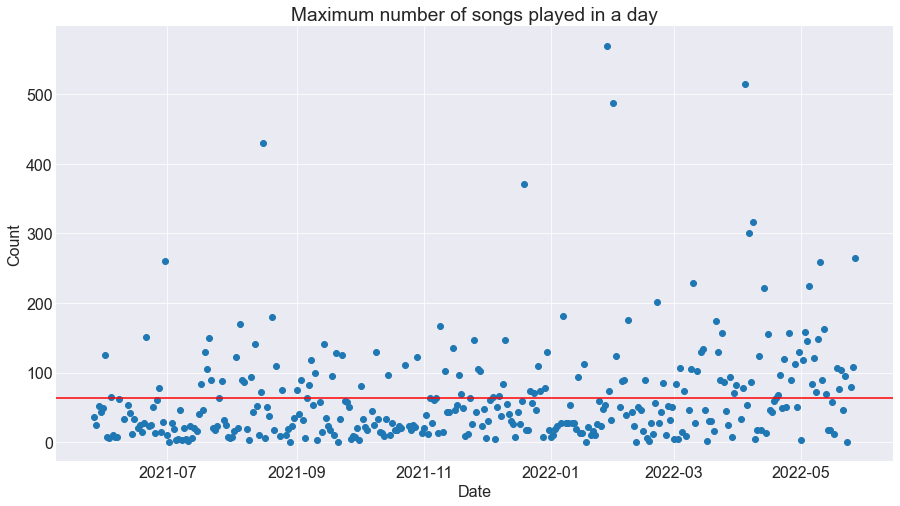

In [135]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(most_songs.index, most_songs["Count"])
ax.set(title="Maximum number of songs played in a day", xlabel="Date", ylabel="Count")
ax.axhline(most_songs["Count"].mean(), linestyle="-", color='r')
plt.show()

### 4.4 My favourite 100 Artist

In [140]:
fav_artists = stream_history_df.groupby(["artistName"])["Count"].count()
fav_artists.sort_values(ascending=False).head(100)

artistName
Maverick City Music    428
Sigrid                 362
Joeboy                 302
Justin Bieber          241
Asake                  236
                      ... 
Jim-E Stack             58
Ed Sheeran              56
Black Sherif            56
Tiwa Savage             56
SPINALL                 55
Name: Count, Length: 100, dtype: int64

Here, we made a group based on the artisName, using the `groupby` and took a count of it. We then sorted the group using the `sort_values` funcition and selected the `Top 100 Artists`.

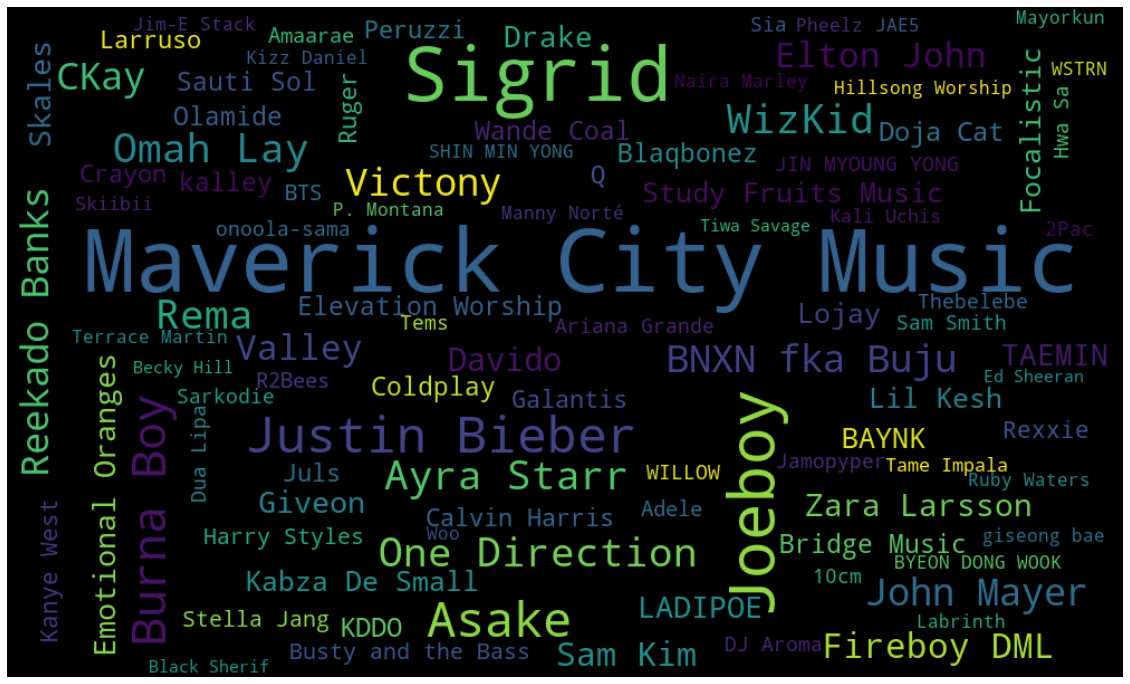

In [147]:
fig, ax = plt.subplots(figsize=(20,15))

wordcloud = WordCloud(width=1000, height=600, max_words=100, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(fav_artists)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False)
plt.show()

Here, we used the `WordCloud` function from `wordcloud` module to create a word cloud given a list or series. We added attributes like:
1. `max_words` to limit the number of words displayes.
2.`width` and `height` for the size 
3. `normalize_plurals` for removing additonal 's from the word

### 4.5 Creating a My Favourite Artist Playlist, Based On My Daily Usage.

In [152]:
fav_artists_playlist = stream_history_df.groupby(["artistName", "trackName"])[["Count"]].count().sort_values(by="Count", ascending=False).head(100)
fav_artists_playlist

,,Count
artistName,trackName,
Sigrid,Mirror,193
Elton John,Cold Heart - PNAU Remix,130
Omah Lay,Understand,125
Skales,This Your Body,118
LADIPOE,Feeling,117
...,...,...
Sauti Sol,Suzanna,44
Joesef,The Sun Is Up Forever,43
MICHELLE,SUNRISE,43


Here, we created a dataframe with my favorite artists and their songs. This was achieved by using the `groupby` function where we used two columns (`artistName`, `trackName`) for categorical grouping. Then we made a playlist based on the counts.

### 4.6  My Favourite 100 Songs?

In [154]:
fav_songs = stream_history_df.groupby(["trackName"])["Count"].count()
fav_songs.sort_values(ascending=False).head(100)


trackName
Mirror                            198
Cold Heart - PNAU Remix           130
Understand                        126
Feeling                           120
This Your Body                    118
                                 ... 
Dream On Me                        45
The Sun Is Up Forever              43
SUNRISE                            43
Your Existence                     43
Slow Dancing in a Burning Room     42
Name: Count, Length: 100, dtype: int64

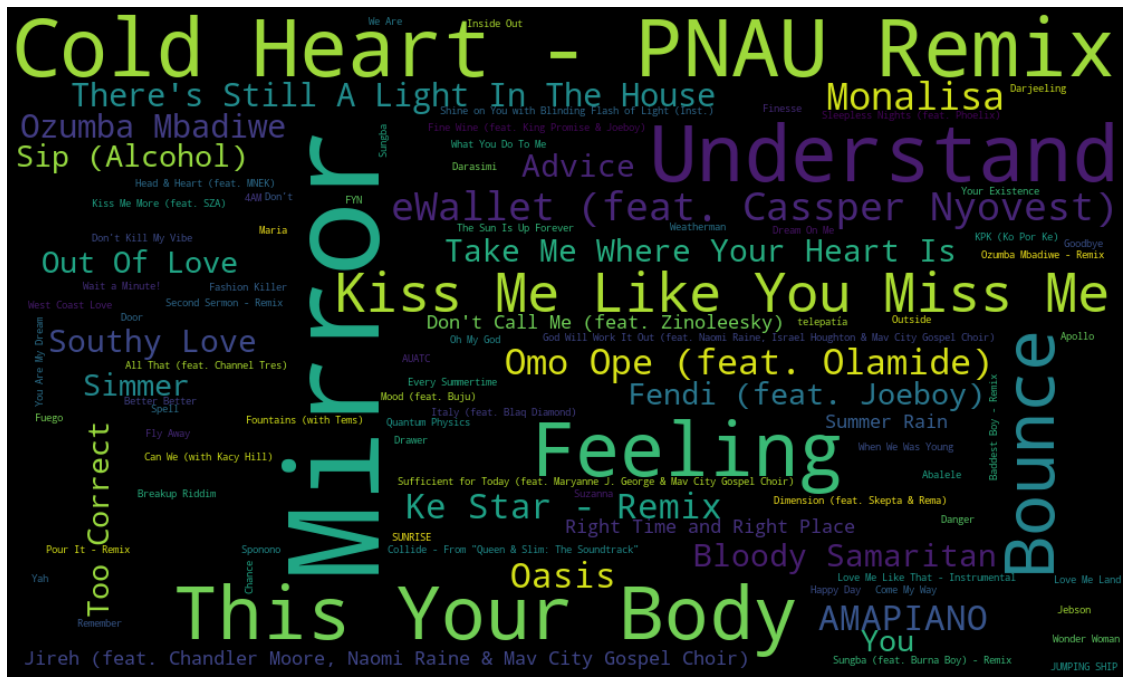

In [155]:
fig, ax = plt.subplots(figsize=(20,15))

wordcloud = WordCloud(width=1000, height=600, max_words=100, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False)
plt.show()

### 4.7 Most Usage ( Active usage in a day over a week) ? 
Here we will be analyzing the day to show:
- My usage based on daily hours 
- My usage based on days over a week. The heatmap will show at what time of what dat I usually listen to more songs.


In [165]:
active_usage = stream_history_df.groupby(['hour', 'day-name'])["artistName"].size().reset_index()
active_usage_pivot = active_usage.pivot("hour", "day-name", "artistName")
active_usage_pivot.head()


day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,88.0,29.0,145.0,58.0,60.0,199.0,129.0
1,38.0,102.0,144.0,31.0,111.0,76.0,31.0
2,124.0,150.0,205.0,194.0,59.0,92.0,87.0
3,115.0,371.0,38.0,183.0,22.0,49.0,204.0
4,30.0,89.0,146.0,72.0,114.0,40.0,63.0


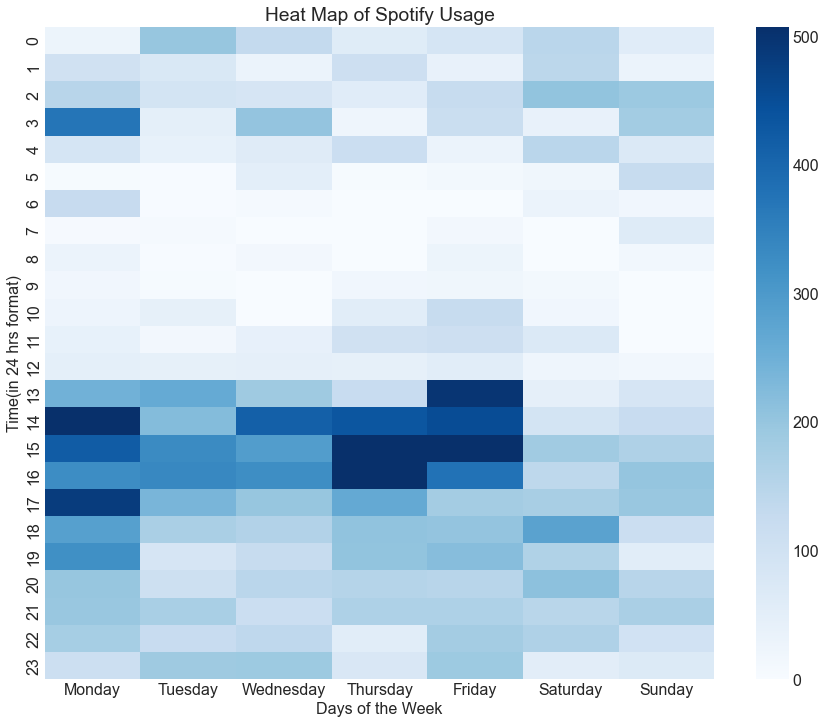

In [172]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax)
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week", ylabel="Time(in 24 hrs format)")
plt.show()


From analyzing the heatmap, we observe that my spotify streaming usage is most frwuent on the **weekdays between 1-4PM**, this information is interesting and useful to Spotify because spotify can specificaly place more ads around this time when my usage is highest.

## Conclusions

We got many useful insights from this datasete. 
- I have played songs from `2194 Unique Artists` which make up `9.99%` of the total artists in my music straming history.
- I have played `4464 Unique Songs` which make up `20.1%` of the total songs in my music straming history.
- I listen to music on `Spotify` the most on `Mondays`
- My most active hours on spotify are between `2-4PM`and my least active hours are between `7-9AM`.
- I play `61 songs` on avergae everyday.
- On the `28th of January 2022` I play `569 songs`, this is my personal record so far.
- My favorite artist is `Maveric City Music` & my favorite song is `Mirror` by `Sigrid`.